In [25]:
# Import libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [3]:
# Import the data from dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

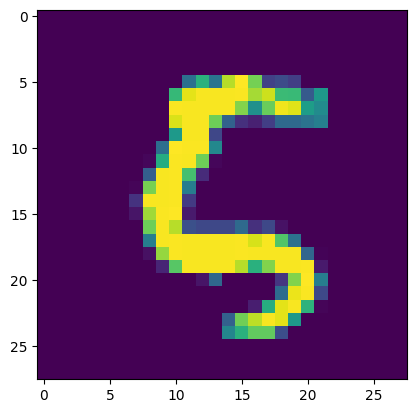

In [7]:
# view data as examples
x_train[2970]
# Use false colors to visualize the array.
plt.imshow(x_train[2000])

In [17]:
# Normalize the data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10])

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [11]:
# Define the plotting
def plot_the_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Value')

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

print("Data set was plotted")

Data set was loaded


In [23]:
# Create a DNN model to train model
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()

    # The feature a stored in 28X28 dimention array
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer
    model.add(tf.keras.layers.Dense(units=32, activation="relu"))

    # Define dropout layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    print("model was compiled")
    return model

# Train the model
def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs, validation_split=validation_split, shuffle=True)

    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    print("model was trained")
    return epochs, hist



In [18]:
# Hyperparameters for the train model
my_learning_rate = 0.002
epochs = 20
batch_size = 5000
validation_split = 0.2

print("hyperparameters are confirmed")

hyperparameters are confirmed


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


model was compiled
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2315 - loss: 2.1440 - val_accuracy: 0.5645 - val_loss: 1.4737
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5702 - loss: 1.4118 - val_accuracy: 0.8219 - val_loss: 0.8757
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7245 - loss: 0.9697 - val_accuracy: 0.8554 - val_loss: 0.5875
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7819 - loss: 0.7389 - val_accuracy: 0.8756 - val_loss: 0.4634
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8188 - loss: 0.6139 - val_accuracy: 0.8918 - val_loss: 0.3967
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8404 - loss: 0.5487 - val_accuracy: 0.9018 - val_loss: 0.3552
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8567 - loss: 0.4870 - val_accuracy: 0.9078 - val_loss: 0.3233
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8657 - loss: 0.4610 - val_a

[0.22467802464962006, 0.9354000091552734]

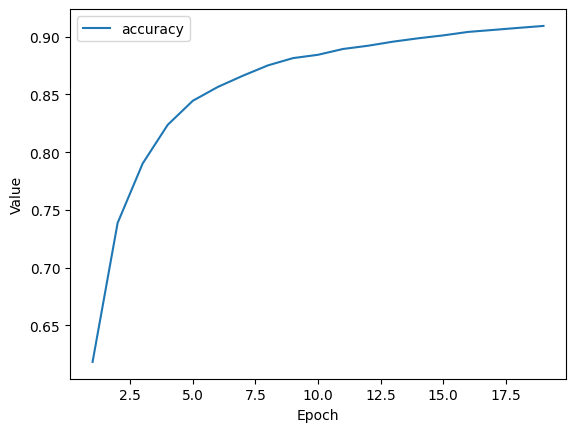

In [24]:
# Establish model topography
my_model = create_model(my_learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_the_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)